In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download the dataset
dataset = MNIST(root='data/',download=True)

In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)

In [5]:
len(test_dataset)

10000

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label : 5


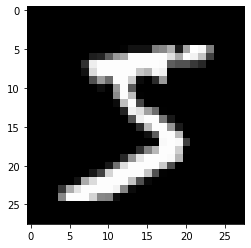

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print("Label :",label)

In [8]:
import torchvision.transforms as transforms

In [9]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

In [10]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [11]:
# lets look at some sample values inside the tensor
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


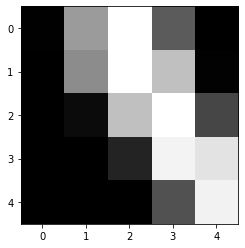

In [12]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [13]:
import numpy as np

def split_indices(n, val_pct):
    # Determine the size of the validation set
    n_val = int(val_pct*n)
    # Create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_val indices for validation set
    return idxs[n_val:], idxs[:n_val]

In [14]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [15]:
print(len(train_indices), len(val_indices))
print("Sample val indices: ", val_indices[:20])

48000 12000
Sample val indices:  [57360 34158 21623  3240 57111 33883 28353  1602  4736 29741 12971 53608
 18610 50332 52523 38300 14931  7169 24105 58652]


In [16]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [17]:
batch_size = 100

# Training sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, batch_size, sampler = train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batch_size, sampler=val_sampler)

In [18]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [19]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0143, -0.0321, -0.0243,  ..., -0.0036,  0.0004, -0.0120],
        [ 0.0126,  0.0296, -0.0173,  ...,  0.0179,  0.0271, -0.0189],
        [ 0.0320, -0.0189, -0.0223,  ...,  0.0282,  0.0055, -0.0137],
        ...,
        [ 0.0094,  0.0105, -0.0351,  ..., -0.0190,  0.0356, -0.0293],
        [ 0.0295,  0.0099, -0.0234,  ...,  0.0051, -0.0350, -0.0051],
        [ 0.0264,  0.0346, -0.0165,  ...,  0.0179,  0.0020, -0.0165]],
       requires_grad=True)

In [20]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0331,  0.0212,  0.0198, -0.0278, -0.0193, -0.0257,  0.0220, -0.0182,
         0.0293, -0.0011], requires_grad=True)

In [21]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [22]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0282, -0.0141, -0.0165,  ..., -0.0312,  0.0299, -0.0284],
         [-0.0064, -0.0020, -0.0302,  ...,  0.0081, -0.0045, -0.0259],
         [ 0.0265,  0.0122,  0.0177,  ...,  0.0098, -0.0140, -0.0207],
         ...,
         [ 0.0119,  0.0038, -0.0245,  ...,  0.0220,  0.0149, -0.0031],
         [-0.0016,  0.0224, -0.0025,  ...,  0.0102,  0.0037,  0.0015],
         [ 0.0004,  0.0266,  0.0022,  ..., -0.0237, -0.0218, -0.0157]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0096, -0.0037, -0.0244, -0.0158,  0.0135, -0.0192, -0.0234,  0.0246,
         -0.0321,  0.0203], requires_grad=True)]

In [23]:
for images, labels in train_loader:
    outputs = model(images)
    break
print("Output.shape :", outputs.shape)
print("Sample outputs :\n", outputs[:2].data)

Output.shape : torch.Size([100, 10])
Sample outputs :
 tensor([[ 0.0531, -0.3576, -0.0669,  0.1665,  0.2361,  0.1053,  0.0763, -0.0827,
          0.3211, -0.0349],
        [ 0.1133, -0.1194, -0.0903, -0.1923,  0.0369,  0.2073, -0.1276, -0.0650,
          0.2546,  0.0866]])


In [24]:
import torch.nn.functional as F

In [25]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

print("Sample probabilites:\n", probs[:2].data)
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilites:
 tensor([[0.0996, 0.0660, 0.0883, 0.1115, 0.1196, 0.1049, 0.1019, 0.0869, 0.1302,
         0.0912],
        [0.1097, 0.0869, 0.0895, 0.0808, 0.1016, 0.1205, 0.0862, 0.0918, 0.1263,
         0.1068]])
Sum:  1.0


In [26]:
#optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Training the model 

In [27]:
# Lets define a function called loss_batch

def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    #calculate loss
    preds = model(xb)
    loss = loss_func(preds, yb)
    
    if opt is not None:
        #compute gradients
        loss.backward()
        #update parameters
        opt.step()
        #Reset gradients
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        #compute the metric
        metric_result = metric(preds, yb)
        
    return loss.item(), len(xb), metric_result

In [28]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # Pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                  for xb, yb in valid_dl]
        #separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        #Total size of the dataset
        total = np.sum(nums)
        # Avg loss across batches
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            # Avg of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [29]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [30]:
loss_fn = F.cross_entropy

In [31]:
val_loss, total, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.2989, Accuracy: 0.1261


In [32]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        #Training
        for xb, yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)
        
        # Evaluation
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        #Print progress
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'
                 .format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, {}:{:.4f}'
                 .format(epoch+1, epochs, val_loss, metric.__name__, val_metric))

In [33]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [34]:
# Lets try for 20 epochs
fit(20, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/20], Loss: 1.8852, accuracy:0.6641
Epoch [2/20], Loss: 1.5860, accuracy:0.7644
Epoch [3/20], Loss: 1.3743, accuracy:0.7892
Epoch [4/20], Loss: 1.2217, accuracy:0.8057
Epoch [5/20], Loss: 1.1085, accuracy:0.8153
Epoch [6/20], Loss: 1.0220, accuracy:0.8233
Epoch [7/20], Loss: 0.9541, accuracy:0.8296
Epoch [8/20], Loss: 0.8992, accuracy:0.8347
Epoch [9/20], Loss: 0.8541, accuracy:0.8383
Epoch [10/20], Loss: 0.8162, accuracy:0.8405
Epoch [11/20], Loss: 0.7840, accuracy:0.8442
Epoch [12/20], Loss: 0.7563, accuracy:0.8467
Epoch [13/20], Loss: 0.7321, accuracy:0.8497
Epoch [14/20], Loss: 0.7108, accuracy:0.8523
Epoch [15/20], Loss: 0.6919, accuracy:0.8539
Epoch [16/20], Loss: 0.6750, accuracy:0.8548
Epoch [17/20], Loss: 0.6598, accuracy:0.8564
Epoch [18/20], Loss: 0.6459, accuracy:0.8578
Epoch [19/20], Loss: 0.6334, accuracy:0.8590
Epoch [20/20], Loss: 0.6218, accuracy:0.8595


## Testing with individual images 

In [36]:
# Define test dataset
test_dataset = MNIST(root='data/', train=False, transform = transforms.ToTensor())

In [37]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label:  7 , Predicted:  7


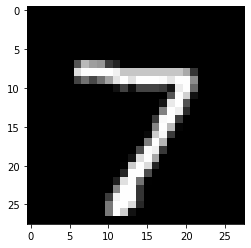

In [38]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

Label:  6 , Predicted:  6


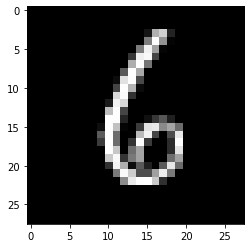

In [39]:
img, label = test_dataset[140]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

Label:  9 , Predicted:  9


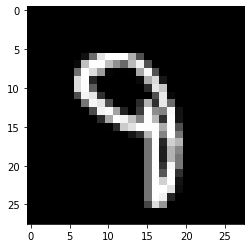

In [40]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

Label:  2 , Predicted:  8


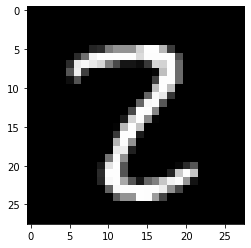

In [41]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label: ', label, ', Predicted: ', predict_image(img, model))

In [42]:
# Lets see the overall loss and accuracy of the model on the test set

test_loader = DataLoader(test_dataset, batch_size = 200)

test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(test_loss, test_acc))

Loss: 0.5927, Accuracy: 0.8718


## Saving and loading the model

In [43]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [44]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0027,  0.0145,  0.0198,  ..., -0.0145,  0.0025,  0.0133],
                      [-0.0148, -0.0278,  0.0204,  ...,  0.0352, -0.0207, -0.0262],
                      [-0.0077,  0.0003,  0.0189,  ...,  0.0100,  0.0129, -0.0213],
                      ...,
                      [ 0.0350, -0.0288, -0.0144,  ...,  0.0262,  0.0347,  0.0255],
                      [ 0.0247, -0.0353,  0.0339,  ...,  0.0305,  0.0197,  0.0018],
                      [ 0.0188, -0.0309,  0.0299,  ..., -0.0069,  0.0295,  0.0228]])),
             ('linear.bias',
              tensor([-0.0539,  0.1367, -0.0203, -0.0037,  0.0364,  0.0781, -0.0426,  0.0723,
                      -0.1051, -0.0128]))])